In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexStew/'

In [3]:
final_df=pd.read_csv('ComplexStew_MS_PerStep.csv')

In [4]:
filtered_carrot = final_df[final_df['Step'].str.strip() == 'Add Carrot']
filtered_carrot = filtered_carrot[~filtered_carrot['Participant'].isin(['C010', 'C022', 'C030'])]
filtered_carrot

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
1,C002,28,Add Carrot,489.520823,696.793809,443.371566,438.114497,587.927154,3007.709395,2211.665362,1453.483221
11,C004,30,Add Carrot,509.738419,686.761077,1475.509102,1198.633244,2128.896733,967.129351,649.044687,580.652897
21,C005,46,Add Carrot,324.531220,439.232042,876.385788,613.136340,1101.918260,1140.626196,144.213006,368.989996
38,C014,32,Add Carrot,572.125945,621.482443,1015.976411,821.079256,1371.759176,2479.955834,1795.758042,1273.314852
48,C015,33,Add Carrot,1186.960102,1423.478153,1888.012667,1548.164236,2091.734313,3677.512173,2910.438663,2137.740781
58,C018,50,Add Carrot,274.056490,456.994332,844.245766,593.923184,1323.123445,1041.964698,670.232599,553.208020
68,C019,40,Add Carrot,338.635267,462.231591,320.211109,318.678709,199.437394,1763.539803,1229.986636,920.463926
82,C023,52,Add Carrot,1148.815241,1283.685937,1873.325753,1582.975662,2006.458525,3581.829647,2818.552211,2113.810533
92,C026,33,Add Carrot,302.945933,465.072978,223.698081,292.922785,162.038118,2131.436409,1905.742975,1209.620948
102,C027,41,Add Carrot,515.044701,536.607618,734.329636,627.317603,640.072857,2337.766837,1700.032890,1241.011001


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_carrot = filtered_carrot.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_carrot.select_dtypes(include=['float64', 'int64']).columns
filtered_carrot[numerical_cols] = filtered_carrot[numerical_cols].replace(0, np.nan)

filtered_carrot[numerical_cols] = imputer.fit_transform(filtered_carrot[numerical_cols])
filtered_carrot

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
1,C002,28.0,Add Carrot,489.520823,696.793809,443.371566,438.114497,587.927154,3007.709395,2211.665362,1453.483221
11,C004,30.0,Add Carrot,509.738419,686.761077,1475.509102,1198.633244,2128.896733,967.129351,649.044687,580.652897
21,C005,46.0,Add Carrot,324.531220,439.232042,876.385788,613.136340,1101.918260,1140.626196,144.213006,368.989996
38,C014,32.0,Add Carrot,572.125945,621.482443,1015.976411,821.079256,1371.759176,2479.955834,1795.758042,1273.314852
48,C015,33.0,Add Carrot,1186.960102,1423.478153,1888.012667,1548.164236,2091.734313,3677.512173,2910.438663,2137.740781
58,C018,50.0,Add Carrot,274.056490,456.994332,844.245766,593.923184,1323.123445,1041.964698,670.232599,553.208020
68,C019,40.0,Add Carrot,338.635267,462.231591,320.211109,318.678709,199.437394,1763.539803,1229.986636,920.463926
82,C023,52.0,Add Carrot,1148.815241,1283.685937,1873.325753,1582.975662,2006.458525,3581.829647,2818.552211,2113.810533
92,C026,33.0,Add Carrot,302.945933,465.072978,223.698081,292.922785,162.038118,2131.436409,1905.742975,1209.620948
102,C027,41.0,Add Carrot,515.044701,536.607618,734.329636,627.317603,640.072857,2337.766837,1700.032890,1241.011001


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Carrot',
    'HeadCamera Distance': 'HeadCamera Distance - Add Carrot',
    'LeftElbow Distance': 'LeftElbow Distance - Add Carrot',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Carrot',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Carrot',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Carrot',
    'RightElbow Distance': 'RightElbow Distance - Add Carrot',
    'RightShoulder Distance': 'RightShoulder Distance - Add Carrot'
}

# Rename columns
filtered_carrot = filtered_carrot.rename(columns=new_column_names)
filtered_carrot

,Participant,Block Design Raw Score,Step,Chest Distance - Add Carrot,HeadCamera Distance - Add Carrot,LeftElbow Distance - Add Carrot,LeftShoulder Distance - Add Carrot,MotionControllerLeft Distance - Add Carrot,MotionControllerRight Distance - Add Carrot,RightElbow Distance - Add Carrot,RightShoulder Distance - Add Carrot
1,C002,28.0,Add Carrot,489.520823,696.793809,443.371566,438.114497,587.927154,3007.709395,2211.665362,1453.483221
11,C004,30.0,Add Carrot,509.738419,686.761077,1475.509102,1198.633244,2128.896733,967.129351,649.044687,580.652897
21,C005,46.0,Add Carrot,324.531220,439.232042,876.385788,613.136340,1101.918260,1140.626196,144.213006,368.989996
38,C014,32.0,Add Carrot,572.125945,621.482443,1015.976411,821.079256,1371.759176,2479.955834,1795.758042,1273.314852
48,C015,33.0,Add Carrot,1186.960102,1423.478153,1888.012667,1548.164236,2091.734313,3677.512173,2910.438663,2137.740781
58,C018,50.0,Add Carrot,274.056490,456.994332,844.245766,593.923184,1323.123445,1041.964698,670.232599,553.208020
68,C019,40.0,Add Carrot,338.635267,462.231591,320.211109,318.678709,199.437394,1763.539803,1229.986636,920.463926
82,C023,52.0,Add Carrot,1148.815241,1283.685937,1873.325753,1582.975662,2006.458525,3581.829647,2818.552211,2113.810533
92,C026,33.0,Add Carrot,302.945933,465.072978,223.698081,292.922785,162.038118,2131.436409,1905.742975,1209.620948
102,C027,41.0,Add Carrot,515.044701,536.607618,734.329636,627.317603,640.072857,2337.766837,1700.032890,1241.011001


In [7]:
tracker_columns = ['Chest Distance - Add Carrot', 'HeadCamera Distance - Add Carrot', 'LeftElbow Distance - Add Carrot', 'LeftShoulder Distance - Add Carrot',
                   'RightElbow Distance - Add Carrot', 'RightShoulder Distance - Add Carrot', 'MotionControllerLeft Distance - Add Carrot',
                   'MotionControllerRight Distance - Add Carrot']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_carrot, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_carrot[block_design_col], filtered_carrot[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_carrot, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Carrot,-0.013699,0.968114
1,HeadCamera Distance - Add Carrot,-0.341687,0.303741
2,LeftElbow Distance - Add Carrot,0.036447,0.915276
3,LeftShoulder Distance - Add Carrot,0.077449,0.820939
4,RightElbow Distance - Add Carrot,-0.186789,0.582361
5,RightShoulder Distance - Add Carrot,-0.241458,0.474435
6,MotionControllerLeft Distance - Add Carrot,-0.141230,0.678724
7,MotionControllerRight Distance - Add Carrot,-0.132119,0.698582


In [8]:
#filtered_carrot.to_csv('ComplexStew_AddCarrot.csv',index=False)

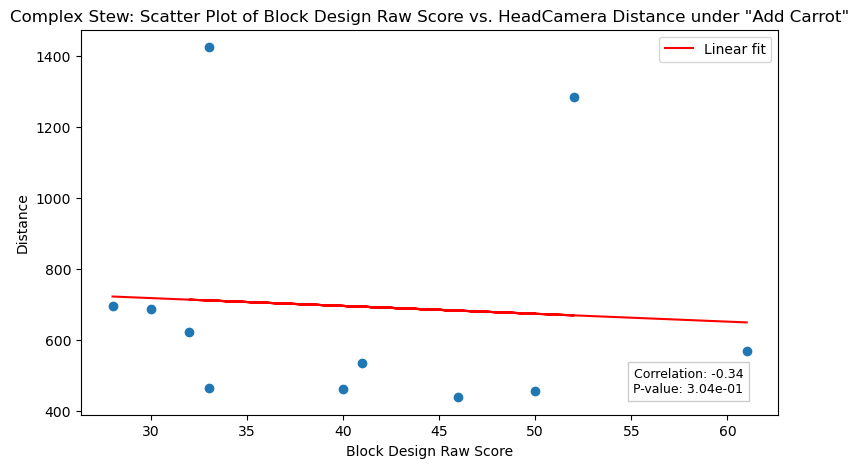

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['HeadCamera Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['HeadCamera Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['HeadCamera Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '25 CS_CarrotDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

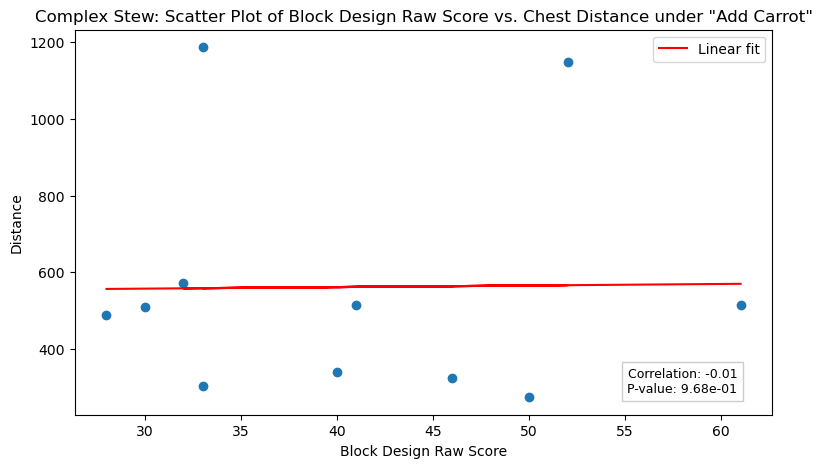

In [10]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['Chest Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['Chest Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['Chest Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Chest Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '26 CS_CarrotDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

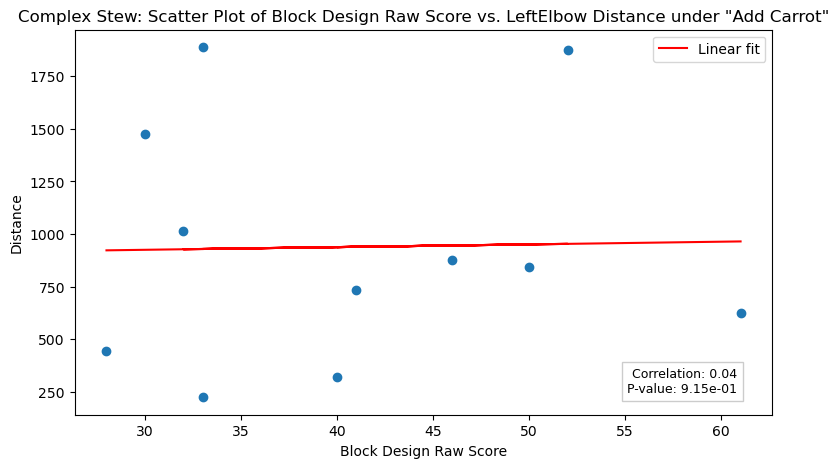

In [11]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftElbow Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftElbow Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftElbow Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '27 CS_CarrotDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

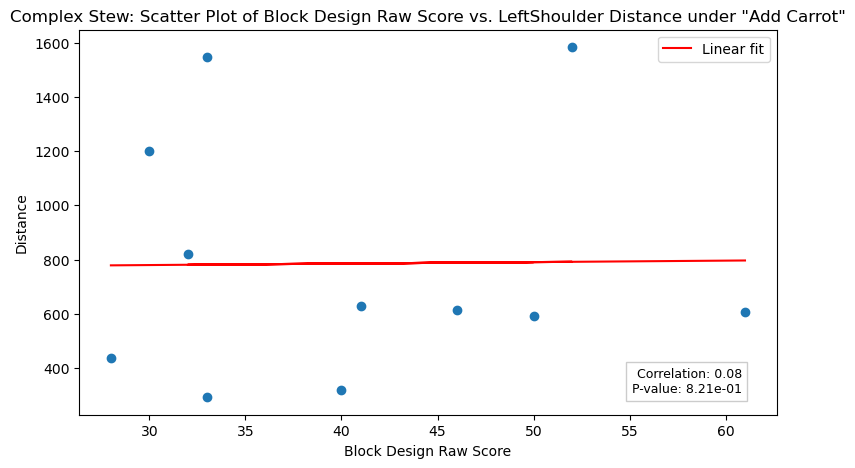

In [12]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftShoulder Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftShoulder Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['LeftShoulder Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '28 CS_CarrotDistanceLeftShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

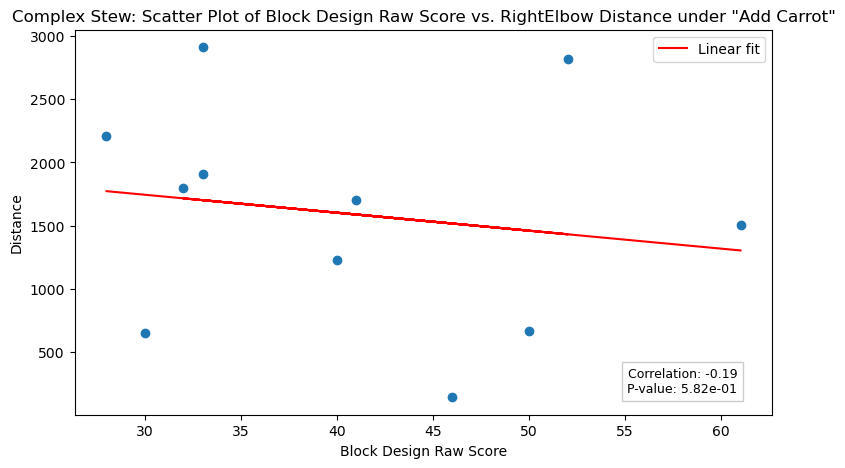

In [13]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightElbow Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightElbow Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightElbow Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '29 CS_CarrotDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

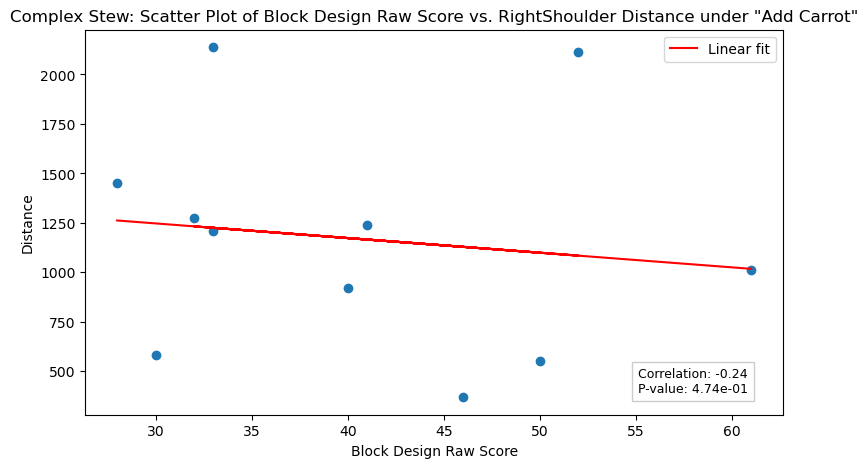

In [14]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightShoulder Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightShoulder Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['RightShoulder Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '30 CS_CarrotDistanceRightShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

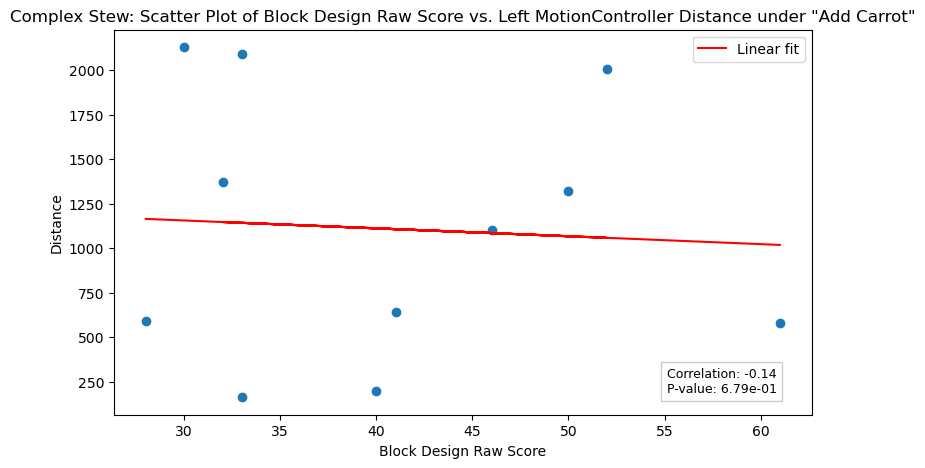

In [15]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerLeft Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerLeft Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerLeft Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '31 CS_CarrotDistanceLeftContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

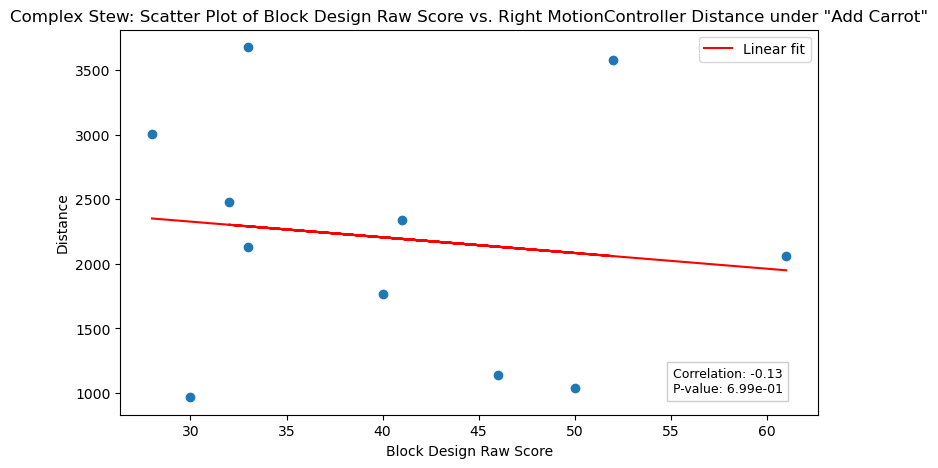

In [16]:
correlation, p_value = spearmanr(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerRight Distance - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerRight Distance - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_carrot['Block Design Raw Score'], filtered_carrot['MotionControllerRight Distance - Add Carrot'], 1)
fit_line = slope * filtered_carrot['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_carrot['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '32 CS_CarrotDistanceRightContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()